# Opdracht Regressie


De bedoeling van regressie is om op basis van een getraind model voorspellingen te doen van continue waarden.
Concreet komt het er op neer dat er een verband gezocht wordt tussen één of meerdere features en een zekere output variabele y. Dit verband is een (multidimensionale) curve van de vorm $y = \theta_n x_n + ... \theta_1 x_1 + \theta_0$. De vector X is de set van features en de set van $\theta$'s noemen we de parameters.

De doelstellingen van deze opdracht zijn:
- Data kunnen inlezen en verwerken met de pandas library.
- Eenvoudige statistische analyses uitvoeren op de data met als doel het detecteren van de consistenties van de data en het kunnen inschatten van de samenhang tussen de verschillende features en de output variabele.  
- Correct kunnen opsplitsen van de data in een training set en test set.
- Weten hoe je data normaliseert.
- Trainen van een regressiemodel.
- Kunnen evalueren van het getrainde regressiemodel via verschillende metrics zoals MAE en de $R^2$-score.
- Feature engineering toepassen: manueel of automatisch extra (hogere orde features) toevoegen.
- Kunnen detecteren van overfitting en underfitting.
- L1 en L2 regularisatie toepassen om te regelen tussen overfitting en underfitting.

In [49]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries inladen

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# Voor statistische data visualisatie
import seaborn as sns; sns.set(color_codes=True)   

## 1. Wijnkwaliteit

Van heel wat (rode en witte) portugese Vinho Verde wijnen(http://www.vinhoverde.pt/en/) werden een aantal chemische parameters opgemeten. Ook werd aan een panel van wijnexperten gevraagd om de wijnen een kwaliteitsscore op smaak te geven tussen 0 en 10.

Een overzicht van de features: 1- fixed acidity | 2 - volatile acidity | 3 - citric acid | 4 - residual sugar | 5 - chlorides | 6 - free sulfur dioxide | 7 - total sulfur dioxide | 8 - density | 9 - pH | 10 - sulphates |11 - alcohol

De output of target variabele is 'quality', de kwaliteitsscore (score tussen 0 en 10).

De bedoeling is om via meervoudige regressie zo betrouwbaar mogelijk de kwaliteitsscore van een wijn te kunnen voorspellen op basis van de chemische parameters ervan.

In [4]:
# Dataset vanuit een csv bestand inlezen in een pandas dataframe.
dataset = pd.read_csv('winequality-red.csv', sep=';')
dataset.shape

(1599, 12)

In [5]:
# Eerste rijen van de dataset
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Statistische vooranalyse

- Geef een samenvattende tabel met beschrijvende centrum- en spreidingswaarden via de describe funtie van pandas.
- Ga na of de dataset ontbrekende waarden bevat.
- Is er op het eerste zicht sprake van uitschieters? Niettegenstaande dit voor multidimensionele gecorreleerde data niet volledig opgaat mag je bij deze opdracht uitschieters aanzien als featurewaarden die meer dan 5 standaardafwijkingen rond het gemiddelde gelegen zijn.
- Maak een correlatie heatmap. Welke features lijken het meest invloed te hebben op de kwaliteitsscore? Zijn er features die onderling sterk gecorreleerd zijn. Als je 5 features zou willen weglaten, welke zouden dit zijn? Verklaar waarom. Bij deze vraag is de verklaring belangrijk.
- Maak een pairplot, bekijk deze aandachtig en formuleer enkele conclusies. Zijn er verbanden te leggen tussen wat je ziet op de pairplot en op de correlatie heatmap?

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
# Weglaten van de uitschieters:
# Normaal gezien alleen maar doen als je weet dat de uitschieters het gevolg zijn van 
# inconsistenties of fouten.
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 5).all(axis=1)]
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1527.0,8.323052,1.757673,4.60000,7.100000,7.9000,9.2500,15.9000
volatile_acidity,1527.0,0.527823,0.177788,0.12000,0.390000,0.5200,0.6400,1.3300
citric_acid,1527.0,0.265383,0.192466,0.00000,0.090000,0.2500,0.4200,0.7900
residual_sugar,1527.0,2.416274,0.922890,0.90000,1.900000,2.2000,2.6000,7.5000
chlorides,1527.0,0.081043,0.020251,0.01200,0.070000,0.0790,0.0890,0.2000
free_sulfur_dioxide,1527.0,15.630321,9.995561,1.00000,7.000000,13.0000,21.0000,57.0000
total_sulfur_dioxide,1527.0,45.407990,31.225392,6.00000,22.000000,37.0000,60.0000,165.0000
density,1527.0,0.996702,0.001859,0.99007,0.995575,0.9967,0.9978,1.0032
pH,1527.0,3.317570,0.150807,2.86000,3.220000,3.3100,3.4000,4.0100
sulphates,1527.0,0.645573,0.136069,0.33000,0.550000,0.6200,0.7200,1.2200


C:\Users\johan\AppData\Local\Temp\ipykernel_25684\4116373314.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

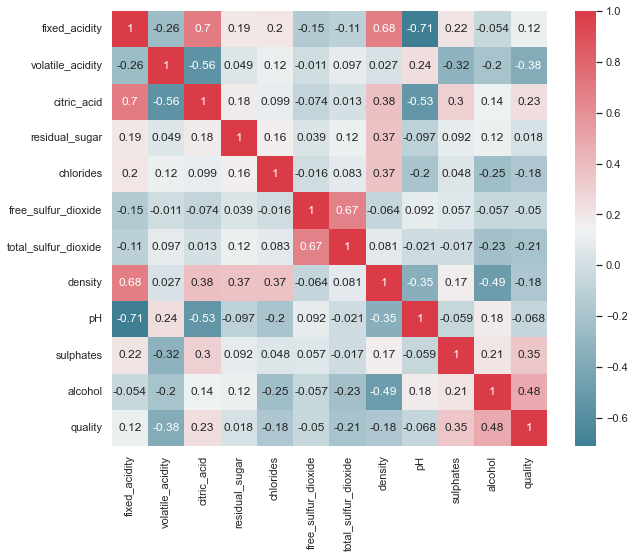

In [10]:
# Lineaire correlatie tussen de features - heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
#Welke features lijken het meest invloed te hebben op de kwaliteitsscore?  -> volatile_acidity, citric_acid, sulphates, alcohol, total_sulfur_dioxide
#Zijn er features die onderling sterk gecorreleerd zijn.  -> fixed_acidity & citric_acid + fixed_acidity & density + fixed_acidity & pH + free_sulfur_dioxide & total_sulfur_dioxide
# Als je 5 features zou willen weglaten, welke zouden dit zijn? Verklaar waarom. Bij deze vraag is de verklaring belangrijk.
# -> features met minste lineaire correlatie met quality : residual sugar, free_sulfur_dioxide & pH
# -> fixed_acidity want sterk lineair verband met zowel citric_acid, density & pH, dus draagt niet zo veel bij.
# -> density want sterke correlatie met fixed_acidity, citric_acid, residual_sugar, chilorides

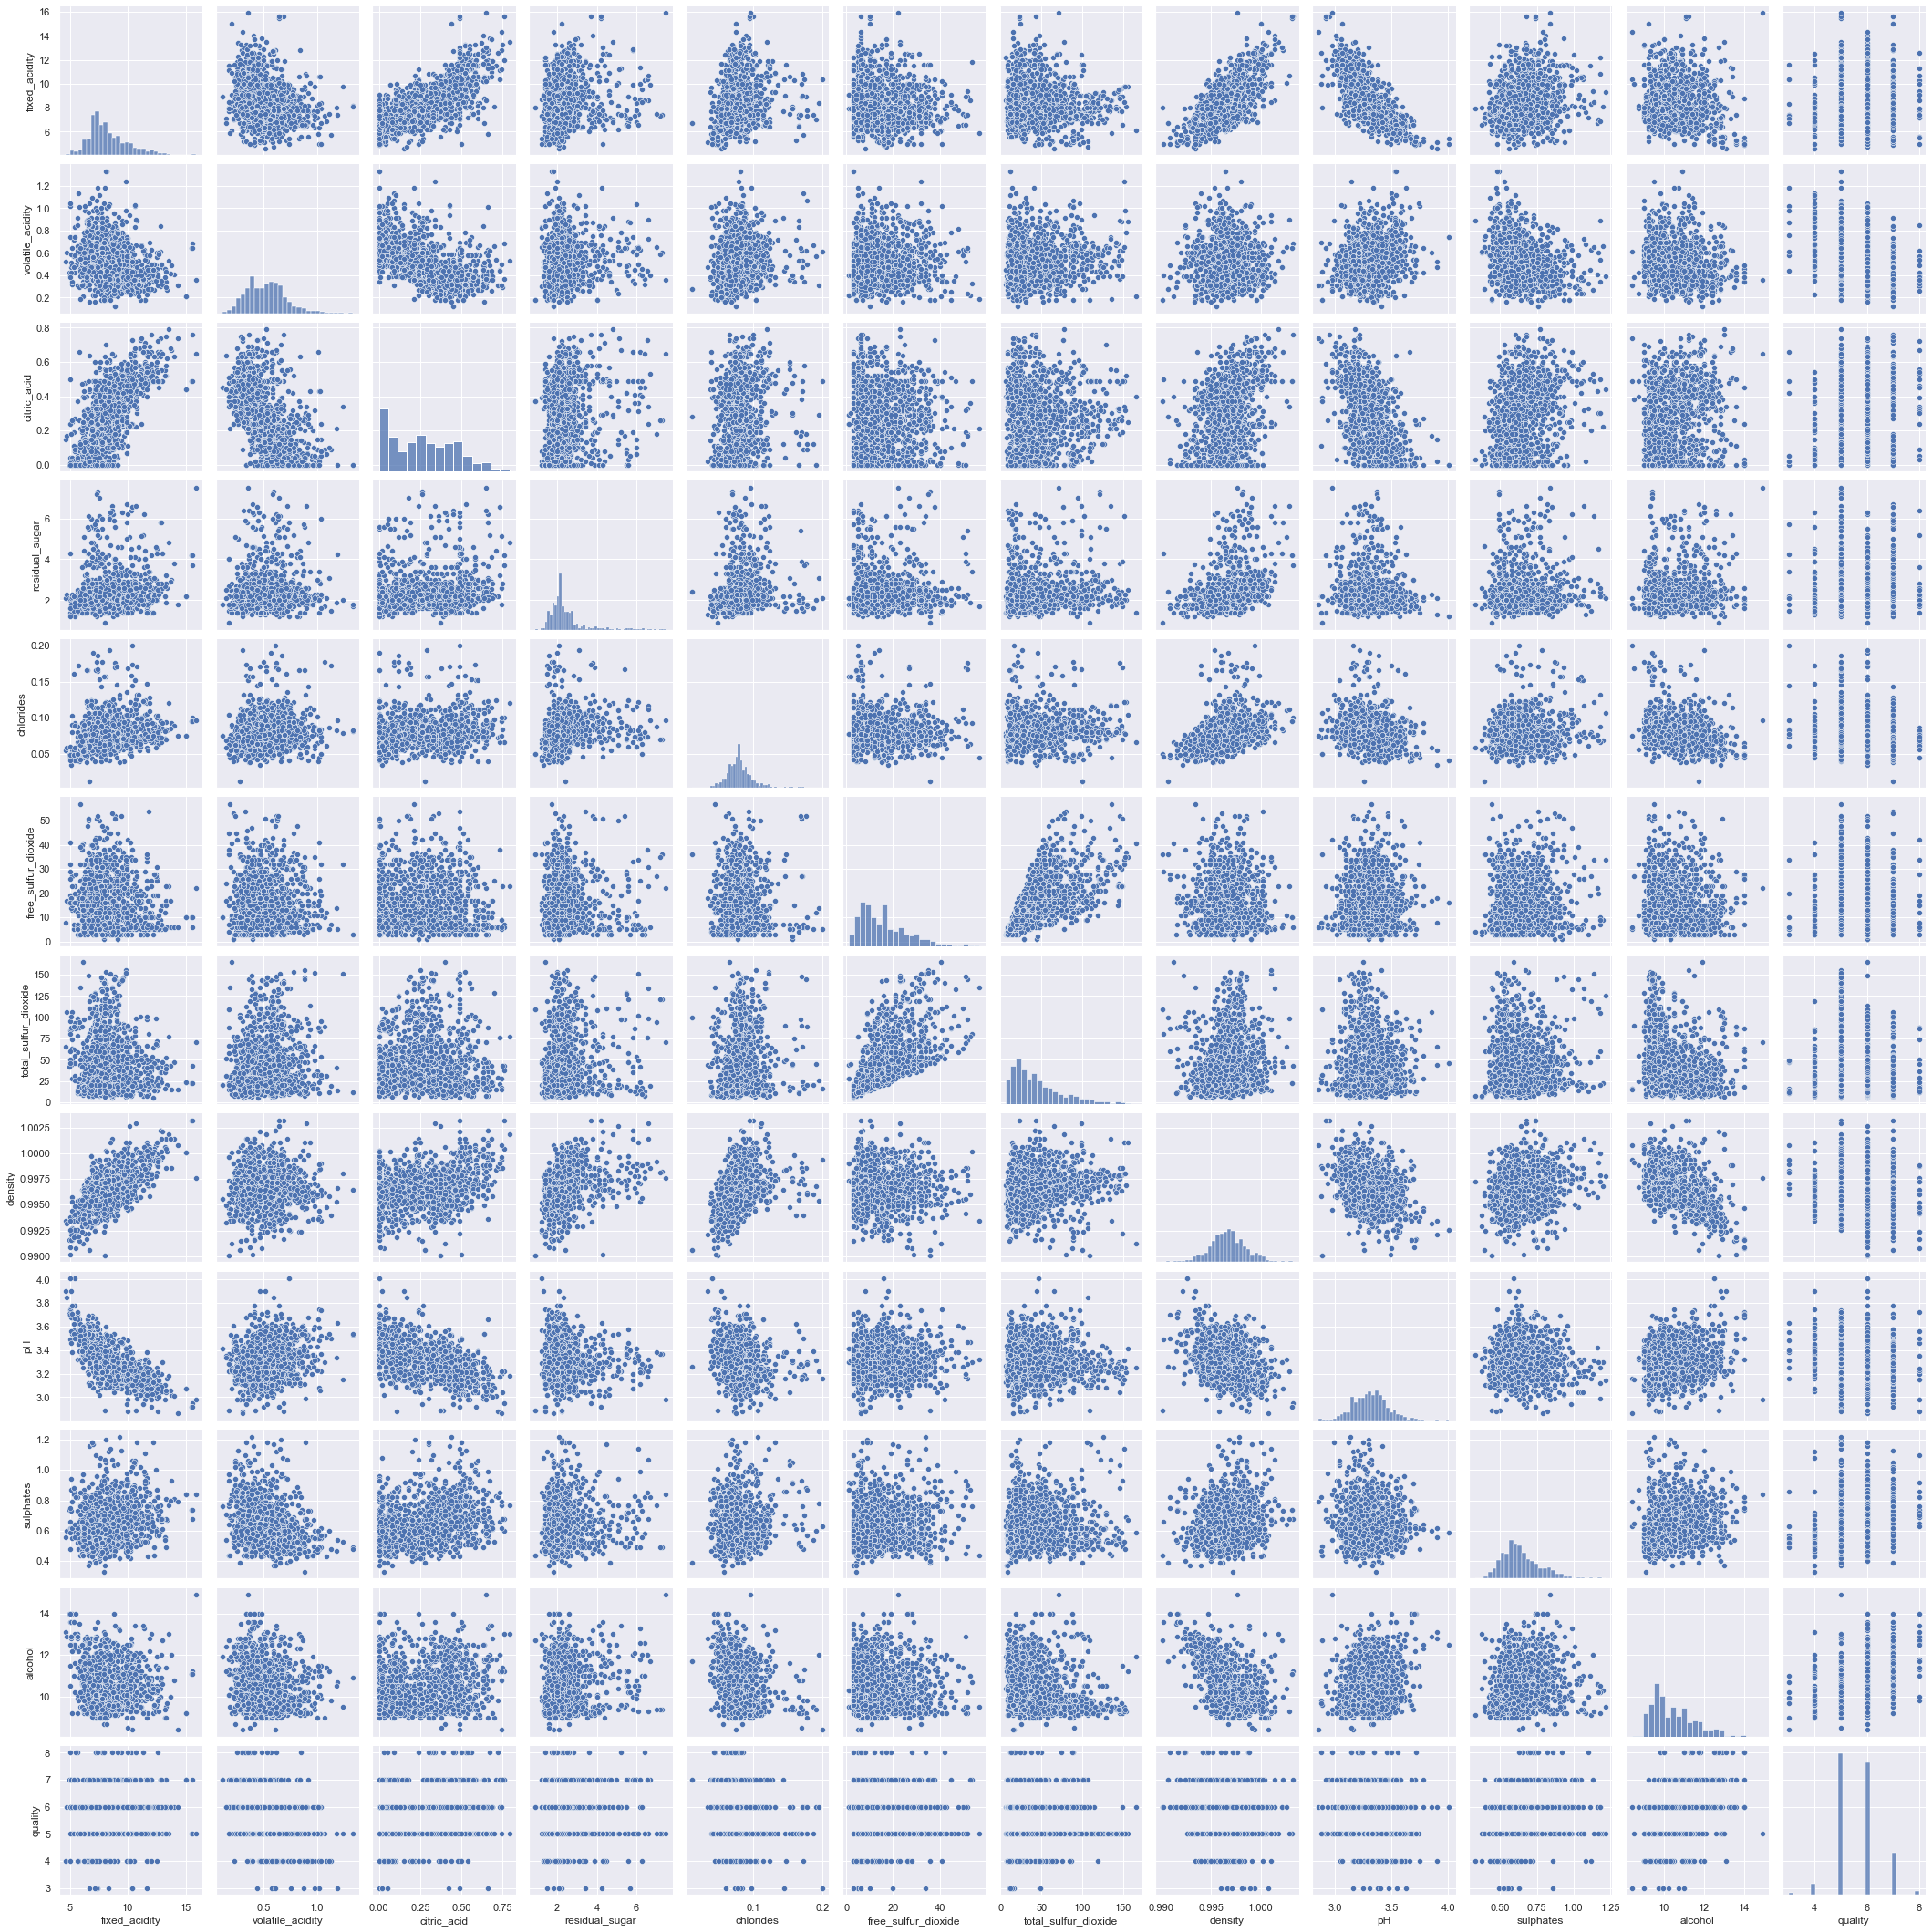

In [11]:
# Pairplot (=scatterplot). (Dit kan wat tijd vragen om te genereren)
# Formuleer conclusies
sns.pairplot(dataset);

### Opsplitsen van de dataset

Splits de dataset op in features X en targets y. Vervolgens kan je de dataset opsplitsen in een training set en een test set. Gebruik hiervoor de functie train_test_split van Sklearn (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Zorg dat er 30 procent van de dataset in de test set terecht komt.

Normaliseer de training set en de test set met een standardscaler. Probeer later ook met een robustscaler.
Verklaar wat het verschil is tussen de standardscaler en de robustscaler.
De labels hoeven niet genormaliseerd te worden.

In [12]:
# Dataset opsplitsen in features en target
y = dataset['quality'].values
X = dataset.drop(['quality'],axis=1)

In [14]:
# Opsplitsen in training set en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [40]:
# Normaliseren van de training set en de test set
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = preprocessing.RobustScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
print(X_train)

[[ 1.8        -1.36        0.81818182 ... -0.21052632  2.05882353
  -0.06666667]
 [-0.3        -0.62        0.75757576 ...  0.21052632  0.94117647
   0.53333333]
 [ 2.2        -1.          0.75757576 ... -0.63157895  1.05882353
   0.        ]
 ...
 [ 0.05        0.78       -0.06060606 ... -0.42105263 -0.47058824
  -0.46666667]
 [ 0.55       -0.28        0.75757576 ...  0.15789474 -0.29411765
  -0.33333333]
 [-0.2         2.38       -0.42424242 ...  1.15789474 -0.11764706
   0.66666667]]


## Trainen van het regressiemodel

Train een regressiemodel via linear_model.LinearRegression(). Print vervolgens de coëfficiënten van het model. 

In [42]:
# Trainen van het regressiemodel
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train, y_train)

LinearRegression()

In [43]:
# print de coëfficiënten en de intercept van het model
print('coeffs: ',lregmodel.coef_)
print('intercept', lregmodel.intercept_)

coeffs:  [ 0.03149193 -0.24056867 -0.05188795  0.00792224 -0.03903662  0.03415673
 -0.11104733 -0.06889263 -0.11820156  0.23524572  0.40423494]
intercept 5.574144480395755


### Testen en voorspellen
Voorspel de kwaliteitsscore van een wijn met chemische parameters:
									
fixed_acidity: 7.3 | 
volatile_acidity: 0.70 | citric_acid: 0.00 | residual_sugar: 1.9 | chlorides: 0.079 | free_sulfur_dioxide: 11.0 | total_sulfur_dioxide: 34.0 | density: 0.9978 | pH: 3.51 | sulphates: 0.58 | alcohol: 9.4

In [44]:
# Voorspelling van de kwaliteitsscore van de wijn.
wine = np.array([7.3, 0.7, 0.0, 1.9, 0.079, 11.0, 34.0, 0.9978, 3.51, 0.58, 9.4])
lregmodel.predict(wine.reshape(1,-1))

array([5.70034315])

Evalueer het regressiemodel op basis van de MAE, MSE en de $R^2$-score. Gebruik hiervoor de test set. Formuleer een aantal conclusies uit deze scores.

In [45]:
# Evaluatie van het model via de MAE, MSE en de R2-score
#MAE
from sklearn.metrics import mean_absolute_error
y_predicted = lregmodel.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print(mae)
from sklearn.metrics import mean_squared_error
y_predicted = lregmodel.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
print(mse)
from sklearn.metrics import r2_score
y_predicted = lregmodel.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print(r2)

0.5058403713550406
0.4231150582066921
0.35315068878859235


### Modeloptimalisatie
Probeer de performantie van het model te verbeteren. Zorg er met andere woorden voor dat de MAE en de MSE verlaagd worden en de $R^2$ score toeneemt.
Mogelijke opties zijn:
- Toevoegen van hogere orde features (manueel). Motiveer waarom je bepaalde hogere orde features zou gebruiken. Kijk hiervoor bijvoorbeeld naar de pairplot of de correlatie heatmap (ga op zoek naar niet-lineariteiten).
- Extra features afleiden uit de bestaande features.
- Toepassen van regularisatie via Ridge regression en Lasso regression. Ga telkens op zoek naar een goede waarde voor alpha. 
- Ga telkens na of er overfitting over underfitting optreedt. Doe dit door de performantie op de training set te vergelijken met de performantie op de test set. 
- Voeg automatisch hogere orde features toe via sklearn.preprocessing.PolynomialFeatures. Ga niet hoger dan 3de of 4de orde. Het aantal features neemt namelijk exponentiëel toe met de orde met als gevolg dat het model niet meer binnen een aanneembare tijd te trainen valt.

Motiveer telkens de gemaakte keuze en evalueer het model met de test set. Wat is de beste performantie die je haalt? **Bespreek het eindresultataat**.

In [63]:
# Modeloptimalisatie en Hyperparameter tuning
dataset2 = dataset.copy()

y = dataset2['quality'].values
X = dataset2.drop(['quality'],axis=1)

#dataset opsplitsen in training en test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.30, random_state=0)

# met L2 regularisatie via Ridge regression
lregmodel2 = Ridge(alpha=10,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
print(lregmodel2.score(X_test_2,y_test_2))

# L1 regularisatie via Lasso regression
lregmodel2 = Lasso(alpha=0.01,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
print(lregmodel2.score(X_test_2,y_test_2))




0.3510423116234703
0.34746549690044026


In [104]:
graad = 3
poly = PolynomialFeatures(graad)
poly.fit(X_train_2)
X_train_poly = poly.transform(X_train_2)
X_test_poly = poly.transform(X_test_2)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(X_train_poly)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


# met L2 regularisatie via Ridge regression
lregmodel2 = Ridge(alpha=50,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_poly,y_train_2)
print('L2 r2 test', lregmodel2.score(X_test_poly,y_test_2))

#python
from sklearn.metrics import r2_score
y_predicted = lregmodel2.predict(X_train_poly)
r2 = r2_score(y_train_2, y_predicted)
print('r2 train', r2)

# L1 regularisatie via Lasso regression
lregmodel2 = Lasso(alpha=0.001,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_poly,y_train_2)
print('L1 r2 test', lregmodel2.score(X_test_poly,y_test_2))

y_predicted = lregmodel2.predict(X_train_poly)
r2 = r2_score(y_train_2, y_predicted)
print('r2 train', r2)


L2 r2 test 0.3632714307222088
r2 train 0.3881538728281466
L1 r2 test 0.3852597626967126
r2 train 0.4182144001704665


In [106]:
### Trainen en testen met gereduceerde features
# Modeloptimalisatie en Hyperparameter tuning
dataset3 = dataset.copy()

# Als je 5 features zou willen weglaten, welke zouden dit zijn? Verklaar waarom. Bij deze vraag is de verklaring belangrijk.
# -> features met minste lineaire correlatie met quality : residual sugar, free_sulfur_dioxide & pH
# -> fixed_acidity want sterk lineair verband met zowel citric_acid, density & pH, dus draagt niet zo veel bij.
# -> density want sterke correlatie met fixed_acidity, citric_acid, residual_sugar, chilorides
dataset3.drop(['residual_sugar', 'free_sulfur_dioxide', 'pH', 'fixed_acidity', 'density'], axis=1, inplace=True)


y = dataset3['quality'].values
X = dataset3.drop(['quality'],axis=1)

#dataset opsplitsen in training en test set
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.30, random_state=0)

In [107]:
# met L2 regularisatie via Ridge regression
lregmodel3 = Ridge(alpha=10,tol=0.0001,fit_intercept=True)
lregmodel3.fit(X_train_3,y_train_3)
print(lregmodel3.score(X_test_3,y_test_3))

# L1 regularisatie via Lasso regression
lregmodel3 = Lasso(alpha=0.01,tol=0.0001,fit_intercept=True)
lregmodel3.fit(X_train_3,y_train_3)
print(lregmodel3.score(X_test_3,y_test_3))

0.3416062257328042
0.3423092434182311


In [131]:
graad = 4
poly = PolynomialFeatures(graad)
poly.fit(X_train_3)
X_train_poly = poly.transform(X_train_3)
X_test_poly = poly.transform(X_test_3)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = preprocessing.MinMaxScaler().fit(X_train_poly)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


# met L2 regularisatie via Ridge regression
lregmodel2 = Ridge(alpha=1,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_poly,y_train_3)
print('L2 r2 test', lregmodel2.score(X_test_poly,y_test_3))

#python
from sklearn.metrics import r2_score
y_predicted = lregmodel2.predict(X_train_poly)
r2 = r2_score(y_train_3, y_predicted)
print('r2 train', r2)

# L1 regularisatie via Lasso regression
lregmodel2 = Lasso(alpha=0.001,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_poly,y_train_3)
print('L1 r2 test', lregmodel2.score(X_test_poly,y_test_3))

y_predicted = lregmodel2.predict(X_train_poly)
r2 = r2_score(y_train_3, y_predicted)
print('r2 train', r2)


L2 r2 test 0.38460876311339
r2 train 0.41571183125366673
L1 r2 test 0.38587586794239415
r2 train 0.4016680809113192


## 2. Bierconsumptie

In het bestand *beerconsumption.csv* vind je een dataset met gegevens over de dagelijkse bierconsumptie in en een bepaalde stad (van het jaar 2015) in functie van de datum en de weersomstandigheden.
Bedoeling is om een regressiemodel te vinden dat een zo accuraat mogelijke voorspelling kan doen van de te verwachten bierconsumptie op een zekere dag met bepaalde te verwachten weersomstandigheden.

De verschillende features omvatten:
- date: datum
- average_temp: gemiddelde temperatuur van die dag in graden Celcius
- min_temp: minimum temperatuur van die dag in graden Celcius
- max_temp: maximum temperatuur van die dag in graden Celcius
- precipitation: de hoeveelheid neerslag in mm
- weekend: binaire variabele (0/1) die aanduidt of het al dan niet weekend is

De te voorspellen variabele (target) is 'consumption', de totale dagelijkse bierconsumptie in liter.


**Opdracht:**

- Controleer de dataset op inconsistenties: ontbrekende waarden, foutieve en extreme waarden
- Voeg twee kolommen toe aan de dataset. Noem deze kolommen 'month' en 'day'. In de ene kolom komt de naam van de maand (January, February, March, ...), in de andere de naam van de dag van de week (Monday, Tuesday, ...). Zoek online hoe je uit de datum de maandnaam en dagnaam kan halen. Verwijder vervolgens de 'date' kolom. Deze hebben we niet meer nodig.
- Vooranalyse: visualiseer de bierconsumptie per maand, bijvoorbeeld via boxplots (https://seaborn.pydata.org/generated/seaborn.boxplot.html). In welke maand wordt het meest bier geconsumeerd en in welke maand het minst? Visualiseer ook de bierconsumptie per dag. Op welke dagen van de week wordt het meest bier geconsumeerd en op welke dag het minst.

- Pas one-hot encoding toe op de features 'month' en 'day'. Zo worden categorische variabelen omgezet naar numerieke one-hot variabelen. Meer info over one-hot encoding is te vinden op https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b.

- Splits op in features en targets en maak vervolgens een training set en test set aan. Zorg ervoor dat er 100 samples in de test set zitten.

- Normaliseer de features. Categorische variabelen hoeven niet genormaliseerd te worden. Baseer je op de histogrammen om te beslissen welke normalisatie je zal toepassen (Standardscaler, MinMaxscaler of Robustscaler). De MinMaxscaler laat one-hot variabelen onveranderd.

- Train een regressiemodel

- Test het getraind model op de test set

- Doe optimalisaties en hyperparameter tuning om de performantie van het model (op de test set) te verhogen. Maak een grafiek van de r²-score in functie van de regularisatieparameter alpha.

- Bespreek het finaal bekomen model. Wat is de R²-score? Wat is de betekenis ervan? Wat zegt de bekomen MAE? Ga ook na welke twee features de grootste invloed hebben op de bierconsumptie.

- Zijn er features die je mag weglaten? Met andere woorden, zijn er overbodige features? Argumenteer.

- Voorspel de bierconsumptie op een zondag in juni bij een gemiddelde temperatuur van 28.64 graden, een min_temp van 25.22 en een max_temp van 31.08. Er is geen neerslag.



In [16]:
# Uitwerking opdracht bierconsumptie

